# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

- Шаг 1. Откройте файл с данными и изучите общую информацию
- Шаг 2. Подготовьте данные

## Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг - - - компьютерных игр и присваивает им подходящую возрастную категорию.

# Шаг 1, 2 Откройте файл с данными и изучите общую информацию и подготовьте данные

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
from scipy import stats as st
%matplotlib inline
# код дял отображения графиков в блокноте

In [5]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('C:/Users/Sergio/Desktop/мои проекты/games.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.columns = df.columns.str.lower()

In [6]:
# Также проверим датасет на наличие дубликатов

df.duplicated().sum()


0

In [7]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Заменю пропущенные значения на пустые строки

In [8]:

df.fillna(
    {"name" : " ", 
     "genre" : " "}
    , inplace=True
)

- TBD - аббревиатура от английского To Be Determined (будет определено)
- Скорее всего отзывов нет.
- Заменю значение "tbd" - "to be determined" на NaN

In [9]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

In [10]:
#Заменю пропущенные значения на no_rated
df['rating'] = df['rating'].fillna('no_rated')

Entertainment Software Rating Board (ESRB) основана в 1994, в ДФ много консолей старых, соответсвенно игры выходили раньше чем организация появилась, и данная организация не присваивала рейтинг "старым играм", так же ESRB работает только США, Канаде, Мексике, следовательно игры которые выходят в других странах не проходят сертификация в ESRB

Преобразую  user_score во float

In [11]:
#df['critic_score']=df['critic_score'].astype('int64')
df['user_score']=df['user_score'].astype('float')
#df['year_of_release']=df['year_of_release'].astype('int64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB



Создам отдельный столбец с суммой продаж по всем регионам total_sales

In [13]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Итоги:
- В работе имеется дата фрейм (Далее - ДФ) который содержит в себе 16715 строк и 12 колонок, пропуски имеются в колонках {Name,Year_of_Release, Genre, Critic_Score, User_Score, Rating}.
- Для удобства чтения привел к нижнему регистру названия всех колонок в ДФ.
- Проверил ДФ на наличие дубликатов.
- В колонках name и genre заменил пропуски на пустые строки т.к. тип object.
- В колонке year_of_release пропущенные значения  заполнять  целесообразности нет, ввиду малого количества пропусков, и отсутствием возможности самостоятельно определить год выхода игры
- В колонке critic_score пропущенных значений гораздо больше, но заполнять синтетическими данными смысла нет, т.к. каждая игра имеет свою критику, и заменять ее медианным или средним значением будет не корректно в рамке моего исследования. 
- В колонке user_score имеется TBD - аббревиатура от английского To Be Determined (будет определено),  заменю значение "tbd" - "to be determined" на NaN, синтетическими данными тоже заполнять не целесообразно ввиду отсутствия необходимой информации от пользователей.
- В колонке rating заменил пропущенные значения на no_rated, заполнять синтетическими значениями не целесообразно, т.к. возрастной рейтинг присваивается каждой игре отдельно, и если в ДФ имеется пропуск, то скорее всего игра не проходила процедуру присвоения возрастного рейтинга.
- Преобразовал в необходимые типы данных столб user_score
- Создал отдельный столбец с суммой продаж по всем регионам total_sales

     

# Шаг 3. Проведите исследовательский анализ данных

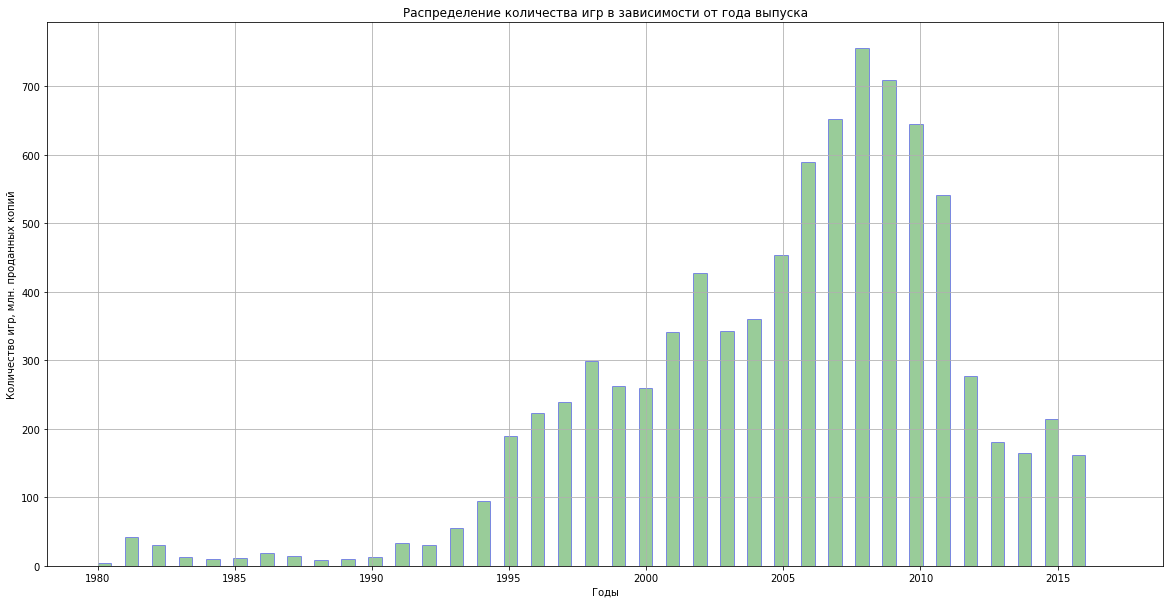

In [14]:
# создадим сводную таблицу по названию игры и году выпуска

years_of_name=df.pivot_table(index='name', values='year_of_release', aggfunc='sum')

# построим гисторграмму по сводной таблице

years_of_name.hist(bins=75, range=(1980,2017), ec='blue', alpha = 0.4, figsize=[20, 10], color='green');
plt.title('Распределение количества игр в зависимости от года выпуска');
plt.xlabel('Годы');
plt.ylabel('Количество игр, млн. проданных копий');
 

у мяня код берет игры со всех платформ, а там у разных платформ одна и таже игра может выйти в разное время

In [15]:
# создадим сводную доску с платформами где больше всего продаж

platform_pivot=df.pivot_table('total_sales', 
                index = ('platform'), 
                aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False).head(30)
platform_pivot

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


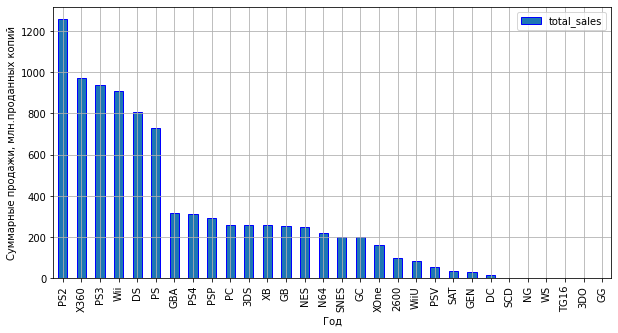

In [16]:
# нарисуем столбчатую диаграмму
platform_pivot.plot(kind='bar', figsize=(10, 5), grid=True, ec='blue')
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Год')
plt.show()

In [17]:
# создадим список популярных платформ платформ
platform_best =platform_pivot.head(6).index.to_list()

In [18]:
# сделаем сводную таблицу с лучшими платфорами
platform_best_pivot=df.query('platform.isin(@platform_best)').pivot_table(index='year_of_release', 
                                                                            columns='platform', 
                                                                            values='total_sales', 
                                                                            aggfunc='sum')
platform_best_pivot

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985.0,0.02,NaN,NaN,NaN,NaN,NaN
1994.0,NaN,6.03,NaN,NaN,NaN,NaN
1995.0,NaN,35.96,NaN,NaN,NaN,NaN
1996.0,NaN,94.70,NaN,NaN,NaN,NaN
1997.0,NaN,136.17,NaN,NaN,NaN,NaN
1998.0,NaN,169.49,NaN,NaN,NaN,NaN
1999.0,NaN,144.53,NaN,NaN,NaN,NaN
2000.0,NaN,96.37,39.17,NaN,NaN,NaN
2001.0,NaN,35.59,166.43,NaN,NaN,NaN


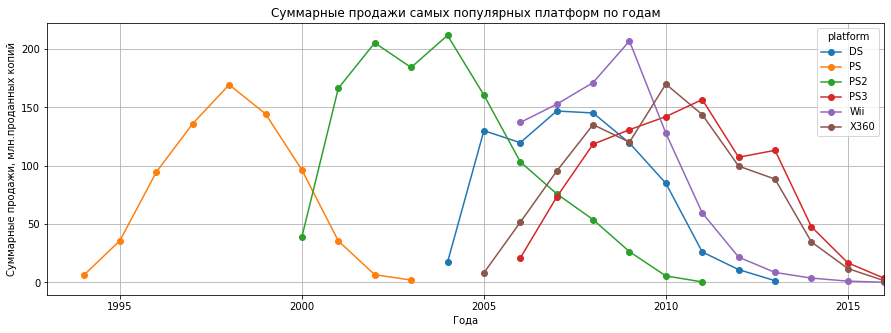

In [19]:
platform_best_pivot.plot(grid=True, figsize=(15, 5), style ='o-')
plt.xlim(1993, 2016)
plt.title('Суммарные продажи самых популярных платформ по годам')
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Года')
plt.show()


срок жизни консоли согластно графика приблизительно 10 лет

Высчитаем примерно актуальный период: 2017 - 10(период жизни одной консоли) делим на 2  = 2012(возьмем период пол жизненного цикла консоли. Таким образом, можно взять период после 2012.

In [20]:
yers_after2012 = df[df['year_of_release']>=2012]
#yers_after2012

Text(0.5, 0, 'Года')

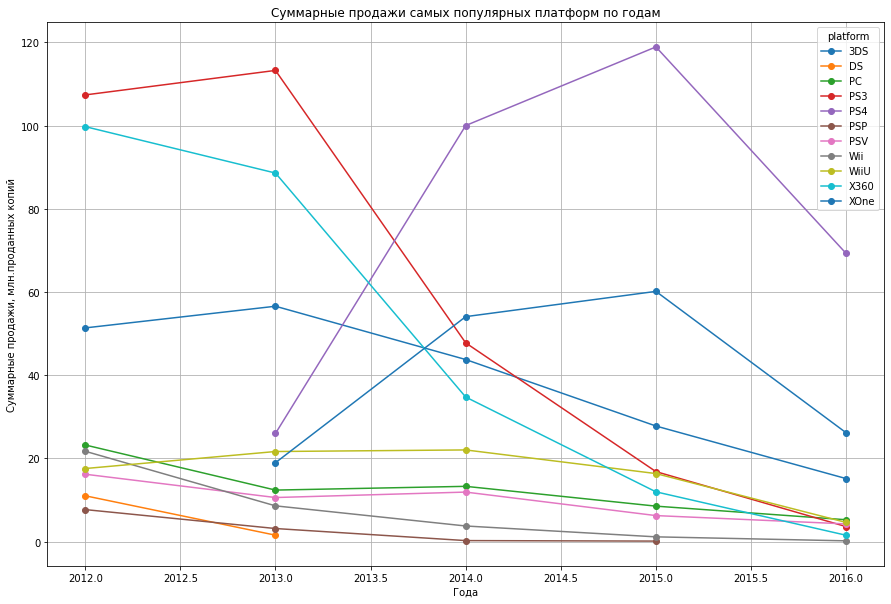

In [21]:
yers_after2012.pivot_table(index='year_of_release', 
                           columns='platform', 
                           values='total_sales',
                           aggfunc = 'sum').sort_values(by = 'year_of_release',
                                                        ascending = False).plot(grid=True, 
                                                                                figsize=(15, 10), 
                                                                                style ='o-')
plt.title('Суммарные продажи самых популярных платформ по годам')
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Года')
                

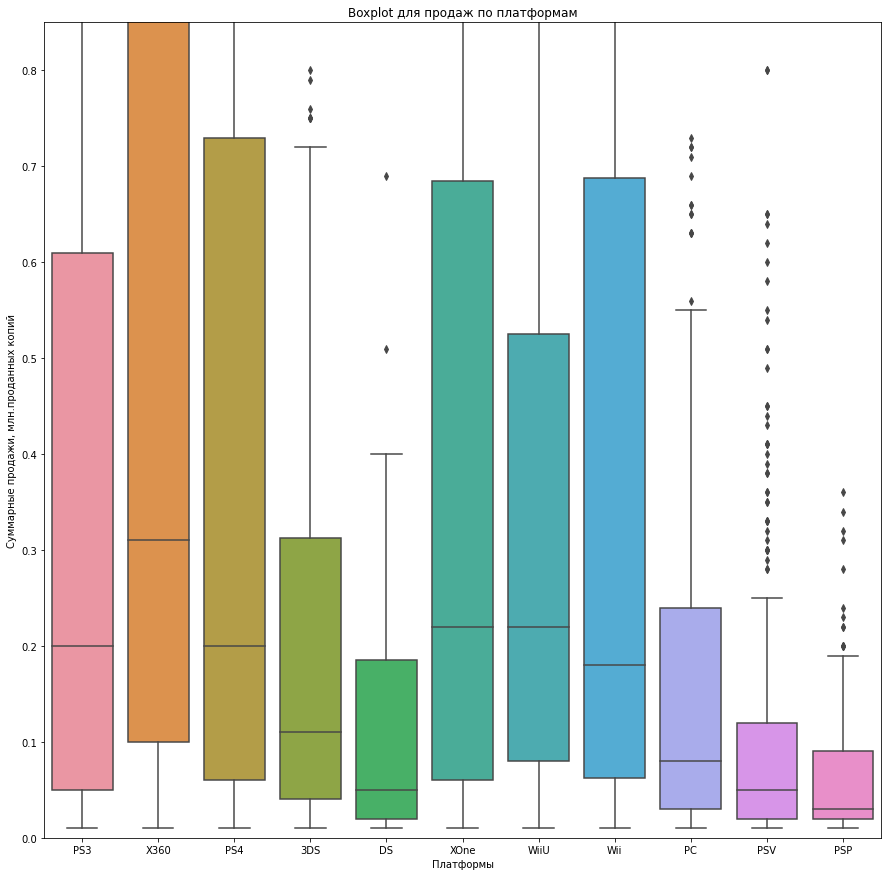

In [22]:
plt.figure(figsize=(15,15))
box_ppl = sns.boxplot(x="platform", y="total_sales", data=yers_after2012)
box_ppl.set(ylim=(0, 0.85))
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Платформы')
plt.title('Boxplot для продаж по платформам')
plt.show()

   



Медианные значения выше у xbox 360, так у же у xbox 360 самый большой межквартильный размах, у Ps3 и Ps4 приблизительно схожие медианные показатели. У ps3, ps4, XOne, Wii схожие межквартильные размахи.

In [23]:
# Возьмем одну из популярных платформ PS4 и рейтинги

platform_best_user = df.query('platform == "PS4"' and 'year_of_release >= 2012')
platform_best_user_loc = platform_best_user.loc[:, ['user_score','critic_score','total_sales']]
display(platform_best_user_loc.corr())


,user_score,critic_score,total_sales
user_score,1.000000,0.517727,0.004429
critic_score,0.517727,1.000000,0.308197
total_sales,0.004429,0.308197,1.000000


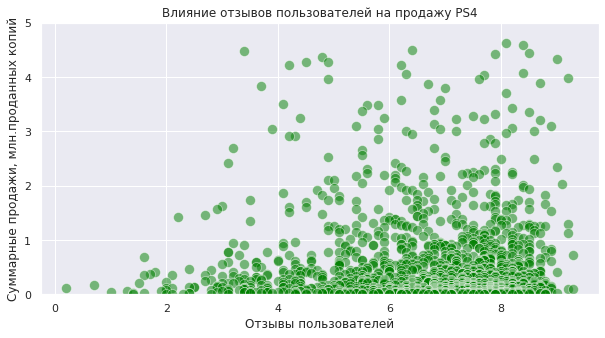

In [24]:
sns.set(rc={'figure.figsize':(10,5)}) 
ax = sns.scatterplot(x="user_score", y="total_sales", data= platform_best_user, 
                     alpha=0.5, color='green', s = 100)
ax.set(ylim=(0,5))
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Отзывы пользователей')
plt.title('Влияние отзывов пользователей на продажy PS4')
plt.show()

Больше всего игр с пользовательским рейтингом от 4 до 8,5 баллов, больше всего игр продается с оценков 6 до 8 баллов, но так же есть игры где рейнтинг от 2,5 до 5 баллов с большими продажами

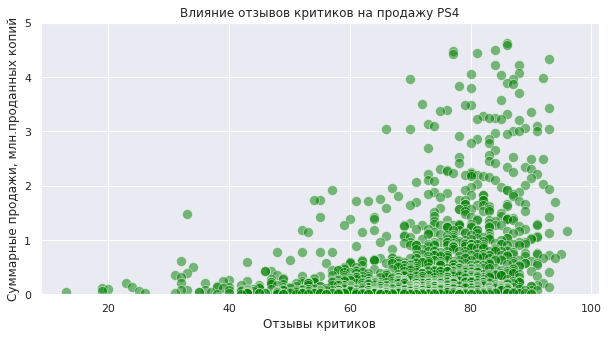

In [25]:
sns.set(rc={'figure.figsize':(10,5)}) 
ax = sns.scatterplot(x="critic_score", y="total_sales", data= platform_best_user, 
                     alpha=0.5, color='green', s = 100)
ax.set(ylim=(0,5))
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Отзывы критиков')
plt.title('Влияние отзывов критиков на продажy PS4')
plt.show()

Больше всего игр с оценками критиков от 4 до 8,5 баллов, больше всего игр продается с оценков 6 до 8 баллов, можно заметить, чем ниже оценена игра, тем меньше проданных копий

# Соотнесите выводы с продажами игр на других платформах

In [26]:
#возьму все иникальные значения платформ

platform_all = df['platform'].unique()


In [27]:
#Напишем функцию, которая будет отрисовывать графики рассеивания и считать корреляции

def other_platform_matrix(name_of_platform):
    platform = df[df['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    
    
    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и количеством продаж ',
              name_of_platform.upper(), ': Слабая', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и количеством продаж ',
              name_of_platform.upper(), ': Умеренная', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и количеством продаж ',
              name_of_platform.upper(), ': Высокая', critic_correl)
    if 0.9 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и количеством продаж ',
              name_of_platform.upper(), ': Весьма высокая', critic_correl)
    if 1 >= critic_correl >= 0.9:
        print('Корреляция между отзывами критиков и количеством продаж ',
              name_of_platform.upper(), ': Сильная', critic_correl)
    
    if 0.3 >= correl >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ',
              name_of_platform.upper(), ': Слабая', correl)
    if 0.5 >= correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ',
              name_of_platform.upper(), ': Умеренная', correl)
    if 0.7 >= correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ',
              name_of_platform.upper(), ': Высокая', correl)
    if 0.9 >= correl >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ',
              name_of_platform.upper(), ': Весьма высокая', correl)
    if 1 >= correl >= 0.9:
        print('Корреляция между отзывами пользователей и продажами ',
              name_of_platform.upper(), ': Сильная', correl)
    print('\n')

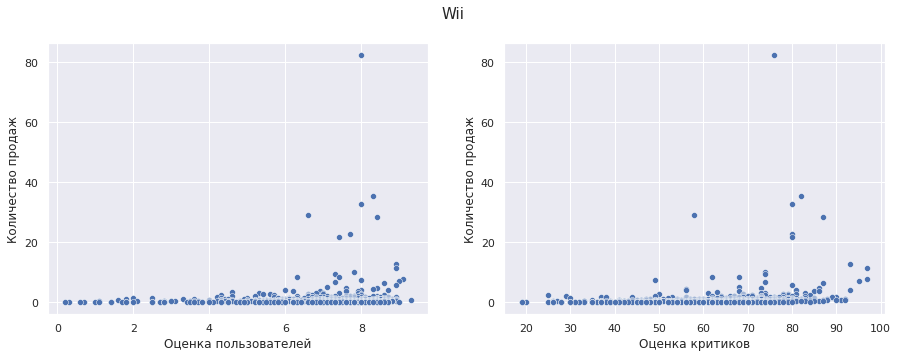

Корреляция между отзывами критиков и количеством продаж  WII : Слабая 0.17755988806089956
Корреляция между отзывами пользователей и продажами  WII : Слабая 0.11241436067003163




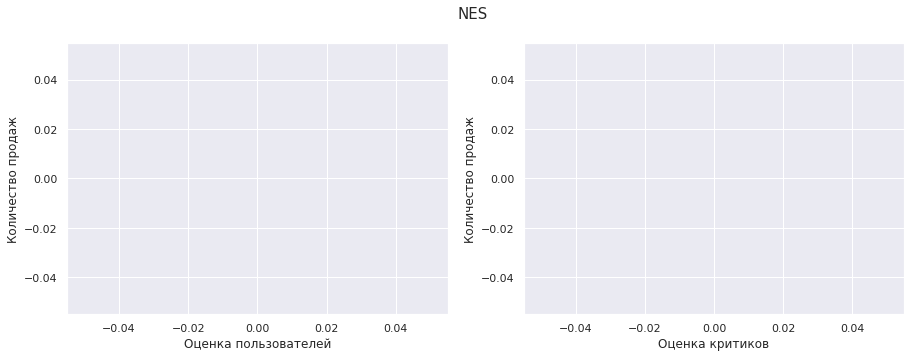

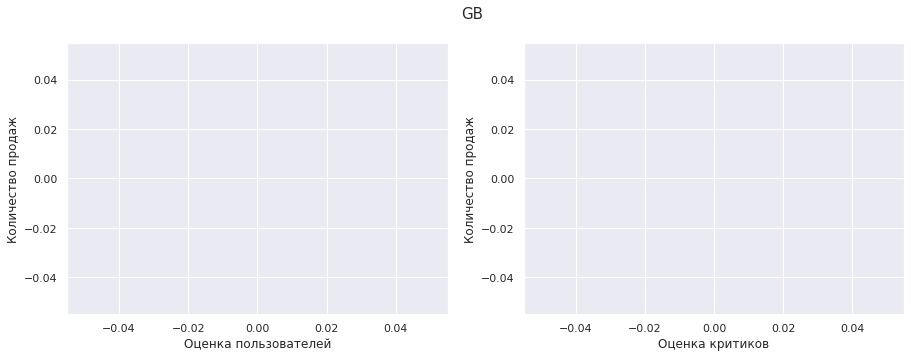

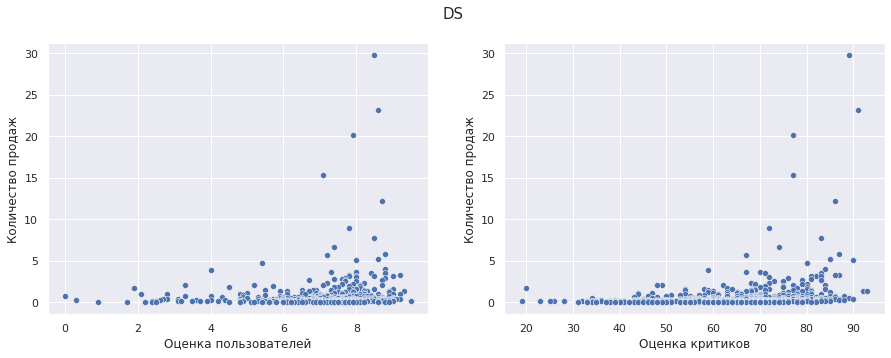

Корреляция между отзывами критиков и количеством продаж  DS : Слабая 0.23637945738859772
Корреляция между отзывами пользователей и продажами  DS : Слабая 0.1304355011164249




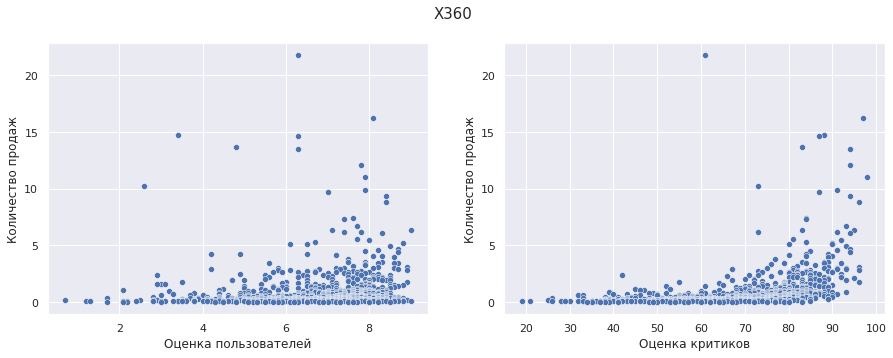

Корреляция между отзывами критиков и количеством продаж  X360 : Умеренная 0.3937358653072584
Корреляция между отзывами пользователей и продажами  X360 : Слабая 0.11445882978454186




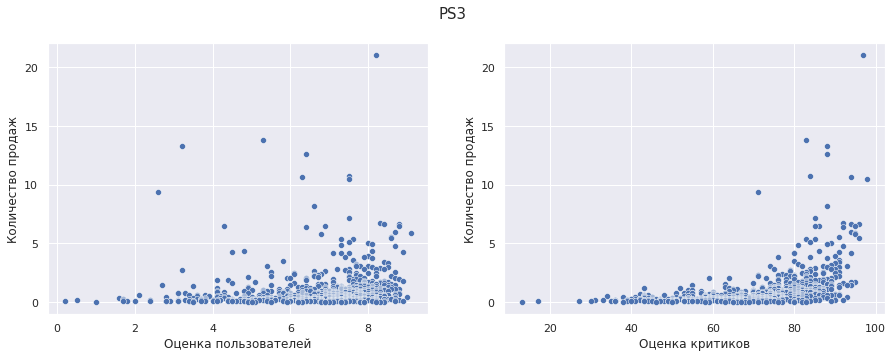

Корреляция между отзывами критиков и количеством продаж  PS3 : Умеренная 0.43243156856420634
Корреляция между отзывами пользователей и продажами  PS3 : Слабая 0.12669133936341692




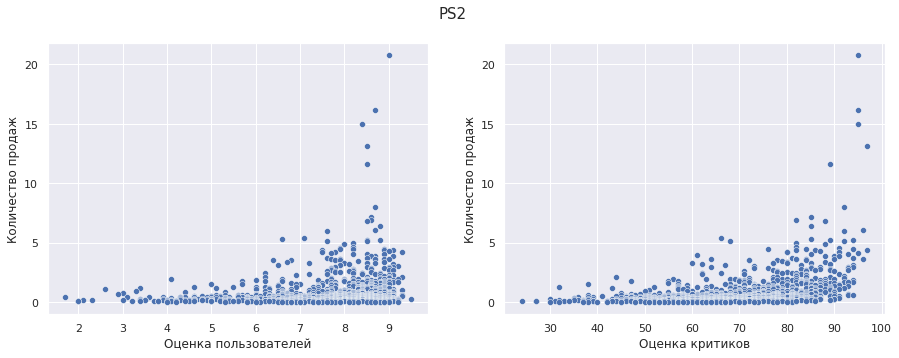

Корреляция между отзывами критиков и количеством продаж  PS2 : Умеренная 0.39543454945454876
Корреляция между отзывами пользователей и продажами  PS2 : Слабая 0.17286551112058227




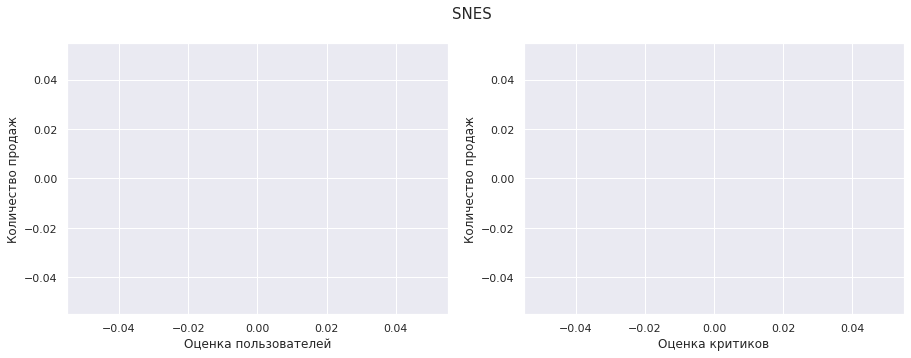

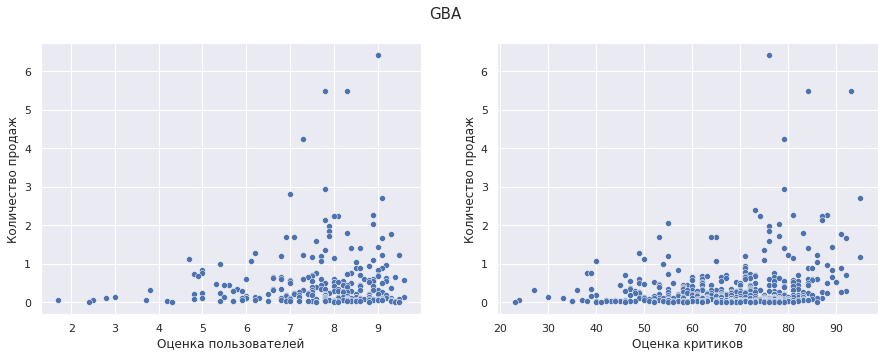

Корреляция между отзывами критиков и количеством продаж  GBA : Слабая 0.23910123563895744
Корреляция между отзывами пользователей и продажами  GBA : Слабая 0.10075832231916067




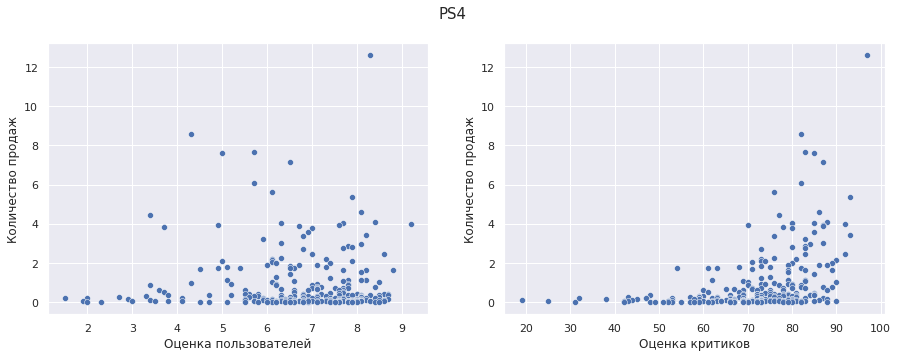

Корреляция между отзывами критиков и количеством продаж  PS4 : Умеренная 0.40656790206178095




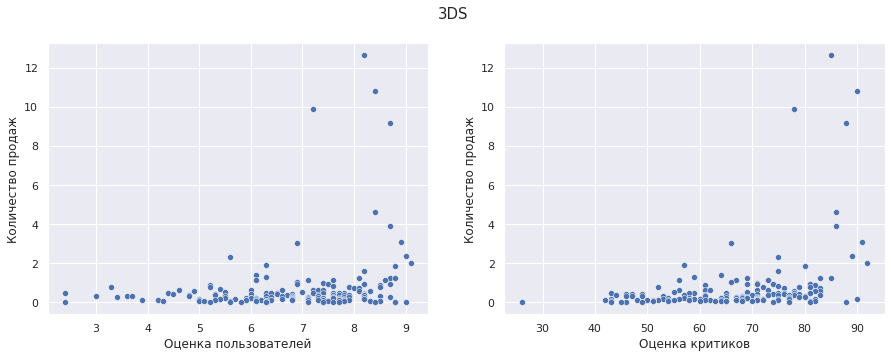

Корреляция между отзывами критиков и количеством продаж  3DS : Умеренная 0.3494009303924131
Корреляция между отзывами пользователей и продажами  3DS : Слабая 0.22480798039571082




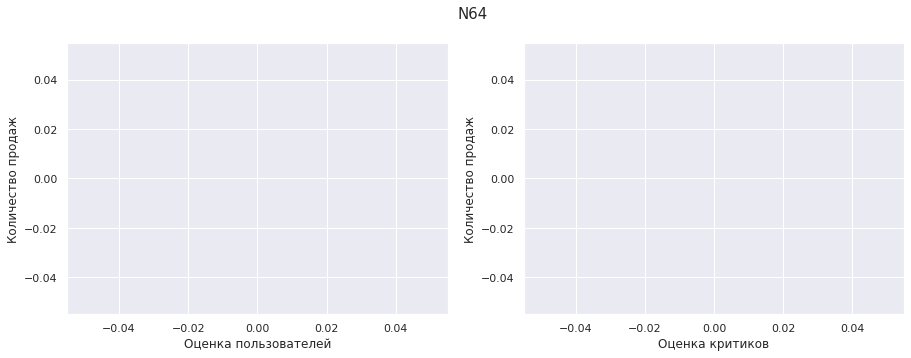

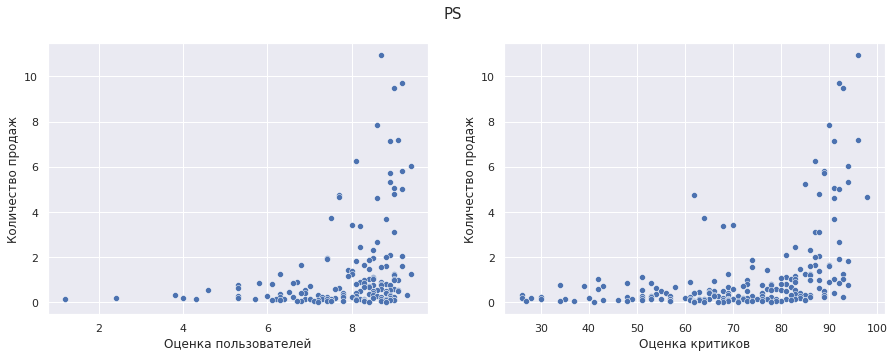

Корреляция между отзывами критиков и количеством продаж  PS : Умеренная 0.44563998586242454
Корреляция между отзывами пользователей и продажами  PS : Слабая 0.29797783612684925




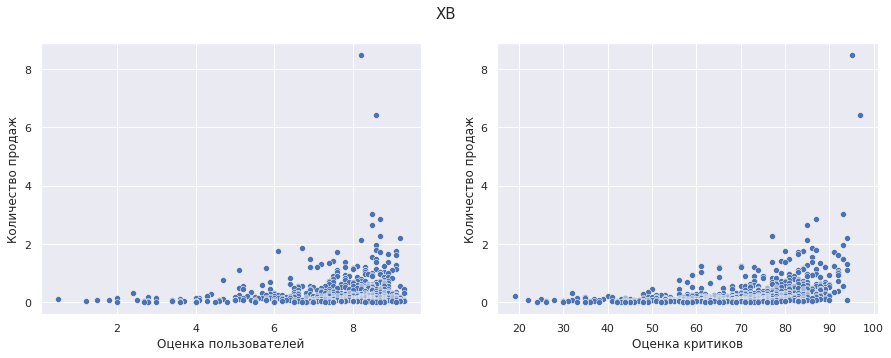

Корреляция между отзывами критиков и количеством продаж  XB : Умеренная 0.38378516793132783
Корреляция между отзывами пользователей и продажами  XB : Слабая 0.1816206784391428




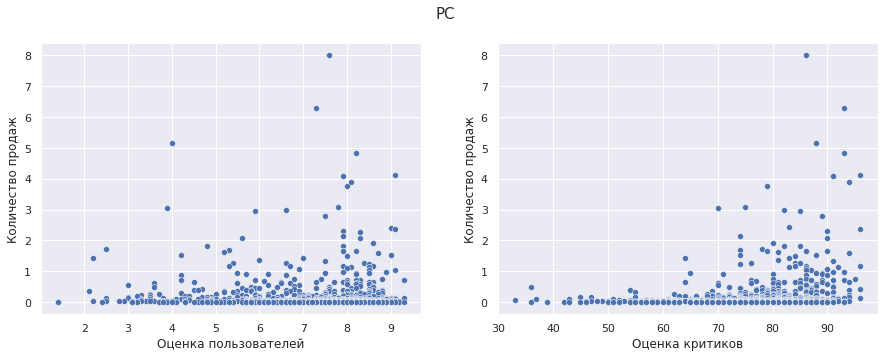

Корреляция между отзывами критиков и количеством продаж  PC : Слабая 0.25688673789482114




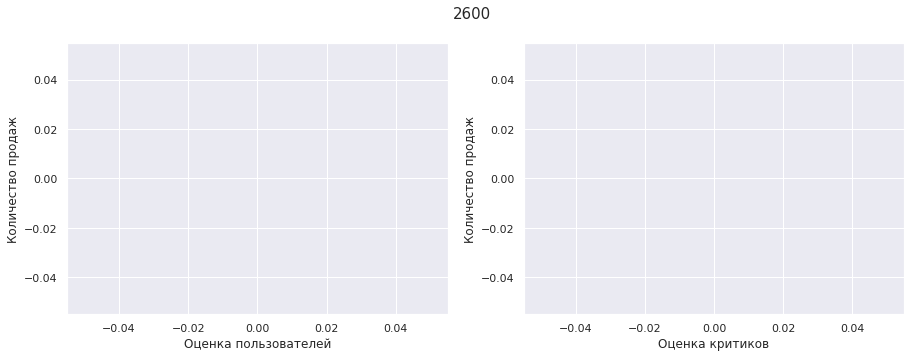

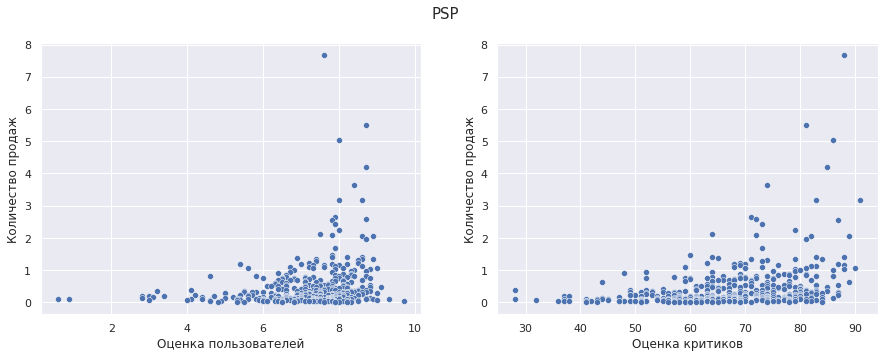

Корреляция между отзывами критиков и количеством продаж  PSP : Умеренная 0.31677456049545616
Корреляция между отзывами пользователей и продажами  PSP : Слабая 0.21926403662980337




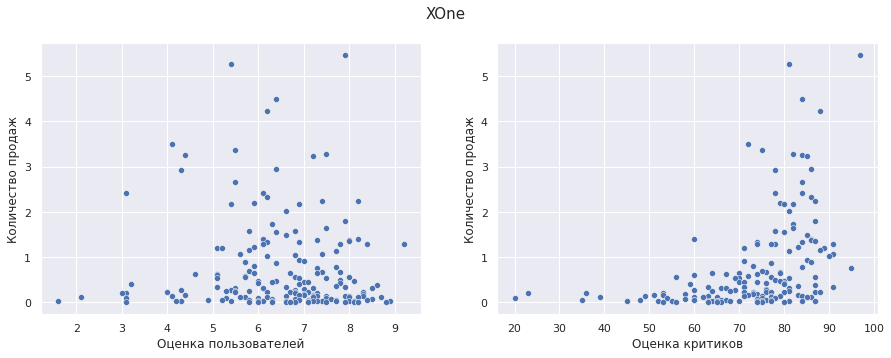

Корреляция между отзывами критиков и количеством продаж  XONE : Умеренная 0.4169983280084017




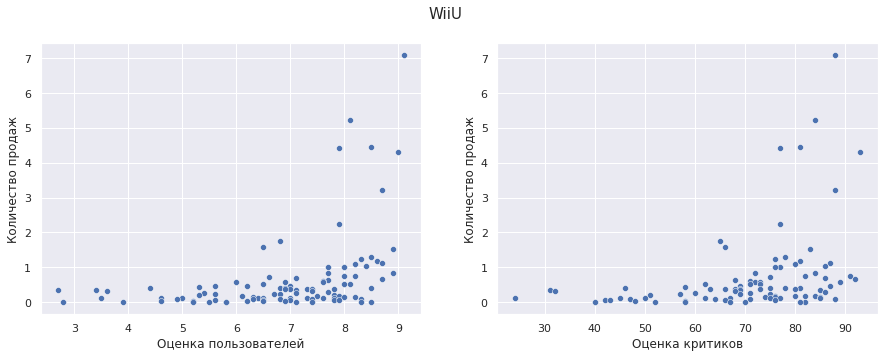

Корреляция между отзывами критиков и количеством продаж  WIIU : Умеренная 0.34837976012017485
Корреляция между отзывами пользователей и продажами  WIIU : Умеренная 0.4002190202148617




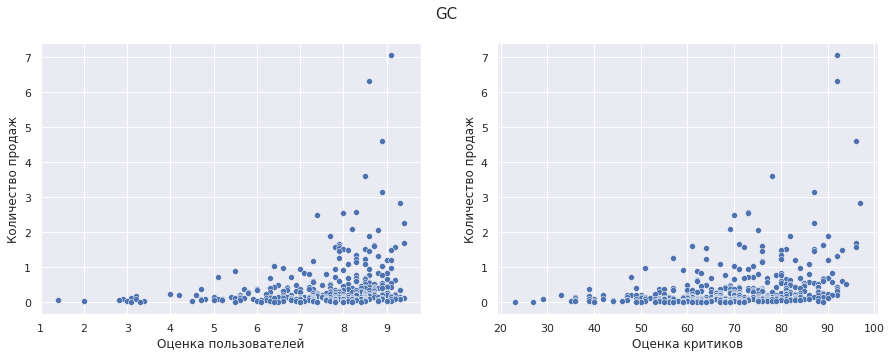

Корреляция между отзывами критиков и количеством продаж  GC : Умеренная 0.32591979981962077
Корреляция между отзывами пользователей и продажами  GC : Слабая 0.2346562672092583




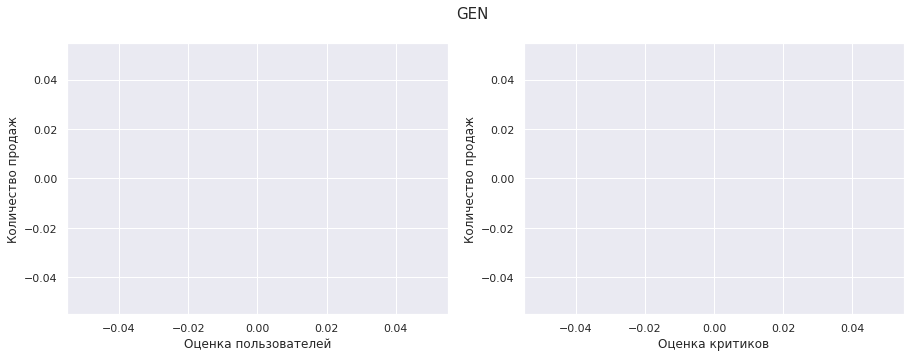

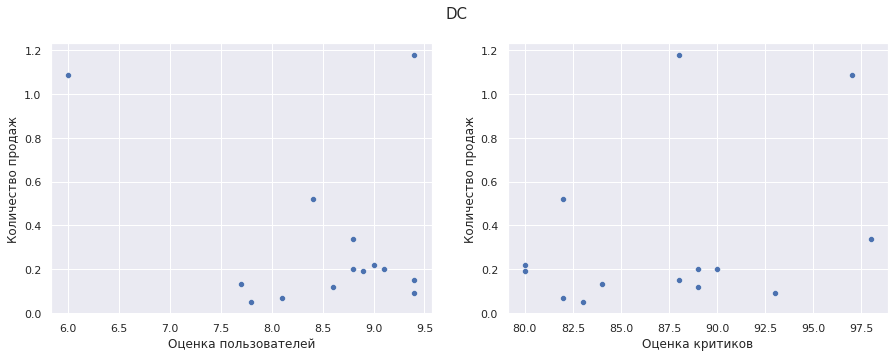

Корреляция между отзывами критиков и количеством продаж  DC : Умеренная 0.3501266355286984




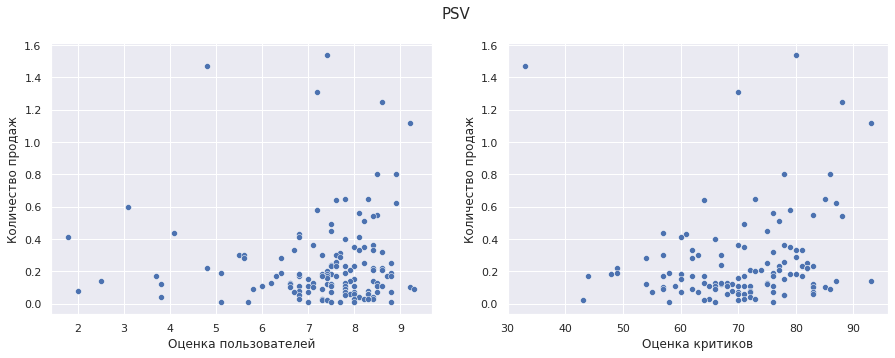

Корреляция между отзывами критиков и количеством продаж  PSV : Слабая 0.1315167215429264




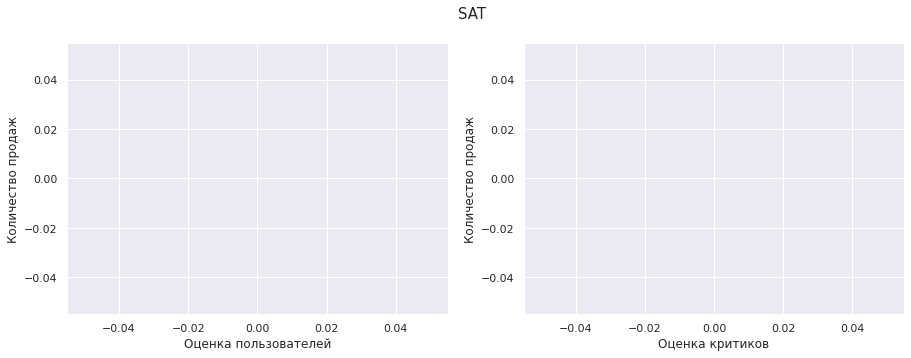

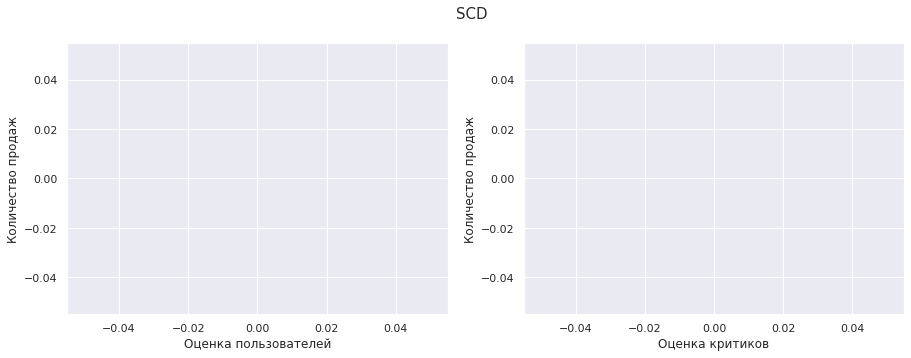

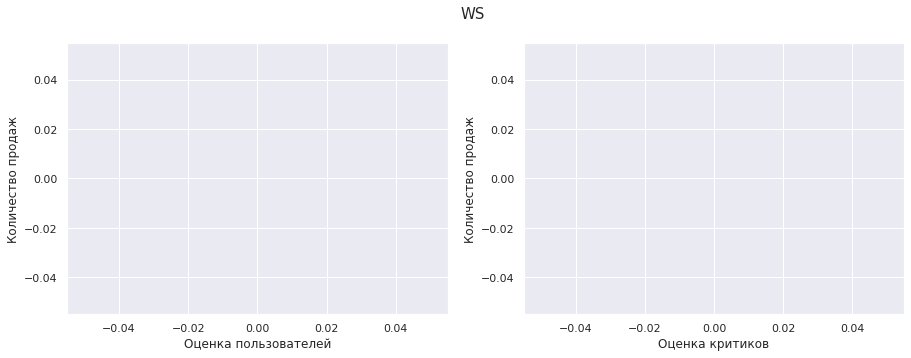

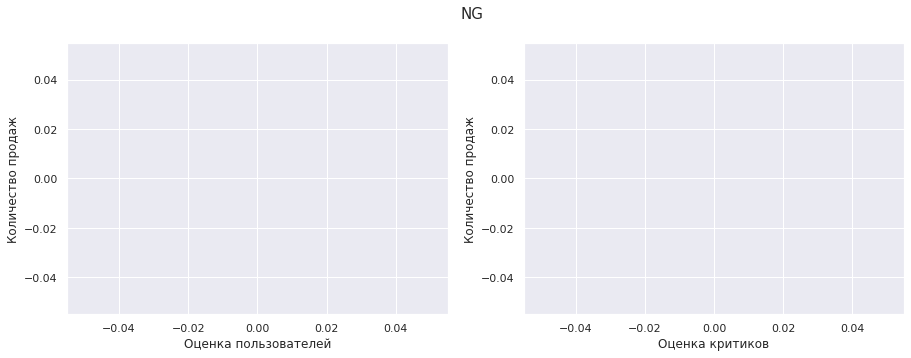

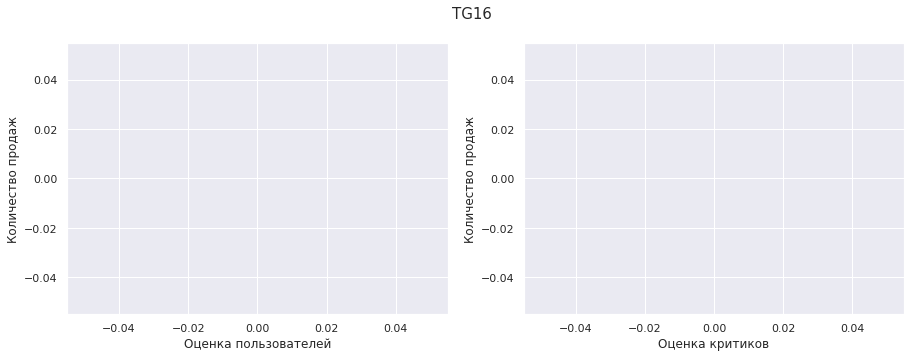

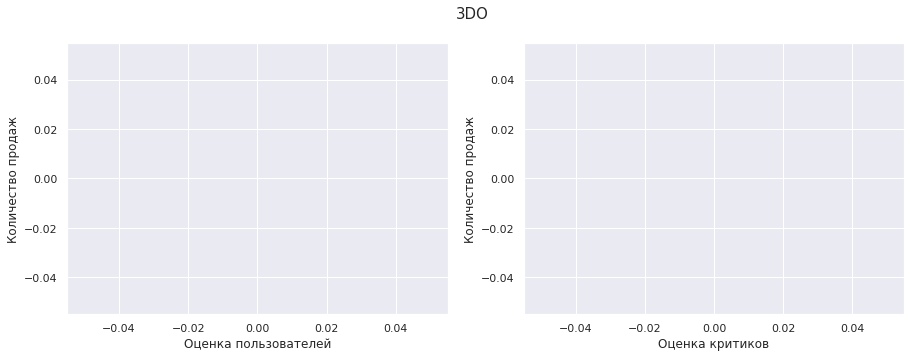

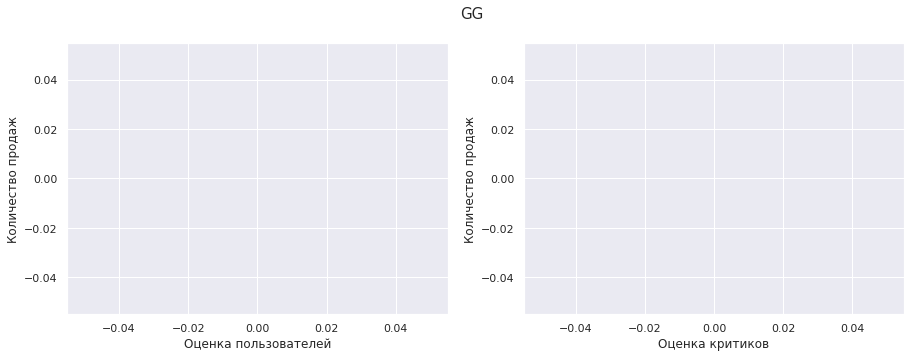

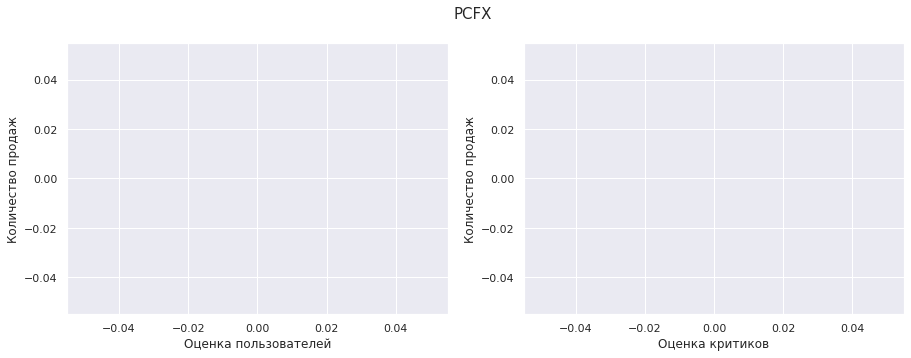

In [28]:
#С помощью цикла выведем все графики по всем платформам, но у страх платформ графики будут пустые, т.к. тогда еще небыло сайтов с отзывами
for platform in platform_all:
    other_platform_matrix(platform)

Проведя исследваоние можно сделать вывод, что отзывы как критков так и пользователей слабо либо незначительно зависят от уровня продаж.

In [29]:
# сделаем сводную по жанрам и продажам, отсортируем, чтобы увидеть самые прибыльные
genre_pivot=df.pivot_table('total_sales', 
                index = 'genre', 
                aggfunc = ['sum','count','median'])
                           
genre_pivot

,sum,count,median
,total_sales,total_sales,total_sales
genre,,,
,2.42,2,1.21
Action,1744.17,3369,0.19
Adventure,237.59,1303,0.05
Fighting,447.53,849,0.21
Misc,802.51,1750,0.16
Platform,827.77,888,0.27
Puzzle,242.57,580,0.11
Racing,728.67,1249,0.19


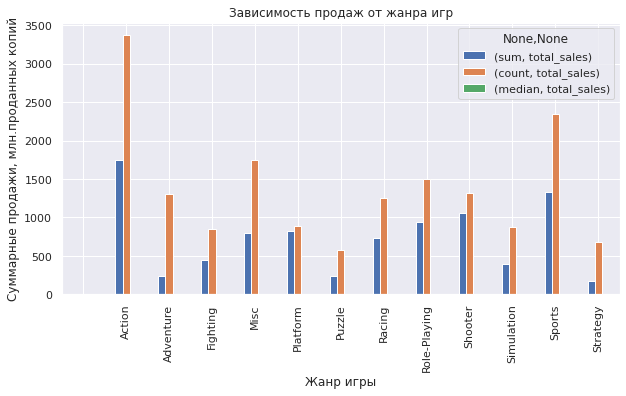

In [30]:
# нарисуем столбчатую диаграмму
genre_pivot.plot.bar()                        
plt.title('Зависимость продаж от жанра игр')
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Жанр игры')
plt.show()

# Итоги
- c 2000 по 2010 год можно увидеть рост количество продаж игр по всем платформам и регионам
- Согласно исследованию можно выделить 6 платформ, где сосредоточенно больше продаж игр и следовательно самых популярных платформ 
- Срок жизни одной платформы согласно исследования приблизительно 10 лет
- С 2013 года идет спад продаж игр на «устаревших платформах», продажи игр на «новом поколении платформ» начинает расти
- По boxplot’am видно, что у платформ большие разбросы по продажам игр, можно сделать вывод, что отдельно взятая игра может стать очень успешной и иметь большие продажи
- По данным с PS4 видно, что корреляции с оценками критиков и пользователей, корреляции нет, скорее всего такие данные получились, из за того, что в изначальных данных проекта мало значений с оценками критиков и пользователей.
- По графику рассеивания пользовательских оценок видно, что больше всего продаж приходится на рейтинг с играми от 6 до 8,5 но так же есть игры с маленьким рейтингом и большими продажами.
- По графику рассеивания оценок критиков  больше всего игр с оценками  от 4 до 8,5 баллов, больше всего игр продается с оценками от 6 до 8 баллов, можно заметить, чем ниже оценена игра, тем меньше проданных копий
- По графику рассеивания оценок  критиков видно, что чем выше рейтинг игры тем больше продаж
- Самым популярным жанром игр являются Экшен, Спорт,  и музыкальные игры, самые не популярные игры это Пазлы и Стратегии,согластно суммарных продаж игр, но так же стоит отметить, что медиана значения Action 0,19 при количетсве 3369 игр, а у Shooter и Platform при малом количестве игр медианное значение 0,24 и 0,27 можно сделать вывод, что данные жанры игр так же пользуются значительным спросом у покупателей, и при малом количетве игр зарабатывают значительно больше чем игры в жанре Экшен



# Шаг 4. Составьте портрет пользователя каждого региона

In [31]:
# создадим список регионов
regions = ['na_sales','eu_sales','jp_sales']


In [32]:
# посмотрим где больше всего продаж
print("Суммарные продажи, млн.проданных копий в регионе")
for reg in regions:
    sum_region=df[reg].sum()     
    print(reg, round(sum_region))

Суммарные продажи, млн.проданных копий в регионе
na_sales 4402
eu_sales 2425
jp_sales 1297


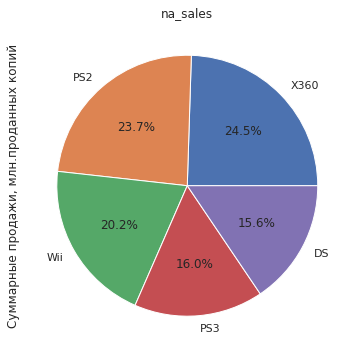

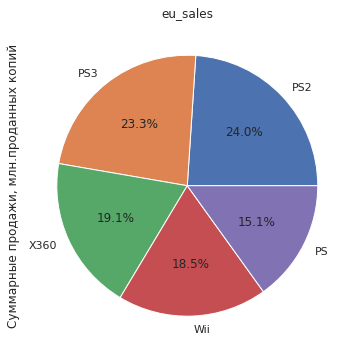

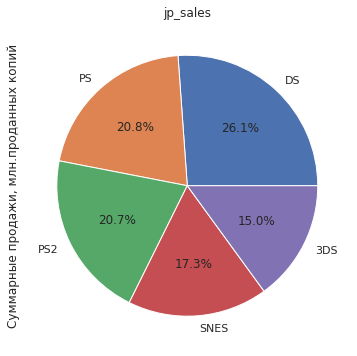

In [33]:
# создадим цикл для быстрого вывода для каждого региона
for reg in regions:
    (df.pivot_table(index='platform', values=reg, aggfunc='sum')
                .sort_values(reg, ascending=False).head(5)
                .plot(kind='pie', y=reg, figsize=(6, 6), legend=False, title = reg, autopct='%1.1f%%')
                .set(ylabel='Суммарные продажи, млн.проданных копий')
    )
    plt.show()

В Америке и Европе и Японии схожие предпочтения по платформе Ps2, Так же можем заметить, что Японцы предпочитают более старые и портативные платформы, у Европейцев и Японцев так же пользуется спросом одна из самых старых платформ это PS, в Америке она не пользуется спросом.

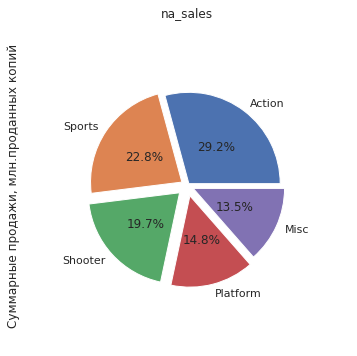

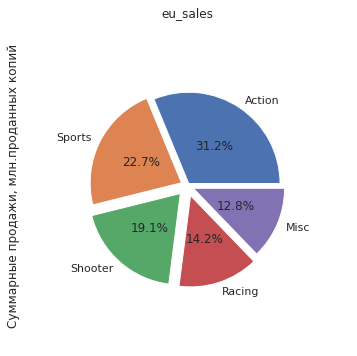

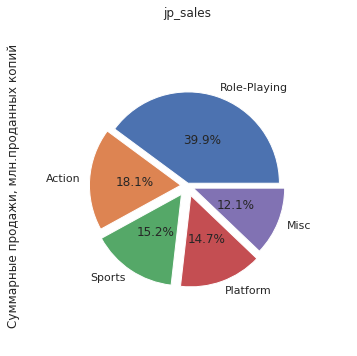

In [34]:
for reg in regions:
    (df.pivot_table(index='genre', values=reg, aggfunc='sum')
                .sort_values(reg, ascending=False).head(5)
                .plot(kind='pie', y=reg, figsize=(6, 6), legend=False, pctdistance=0.5, 
                      labeldistance=1.1, radius=0.7, title = reg, autopct='%1.1f%%', explode = [0.02, 0.05, 0.08, 0.08, 0.05])
                .set(ylabel='Суммарные продажи, млн.проданных копий')
    )
    plt.show()

согластно pie-диаграмм у пользователей Северной Америки и Европы схожие игровые предпочтения, они предпочитают игры в жанре Экшен, Шутер, спорт, отличием будет, что Европейские игроки так же предпочитают гоночные игры, а в Северной Америке платформеры.
Японский рынок значительно отличается, там большим спросом пользуются игры в жанре РПГ, схожие предпочтения с Европой и Америкой относительно жанра Экшен и Платформер.

# Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [35]:
#посмотрим уникальные значения
spisok_raiting=df['rating'].unique()
spisok_raiting

array(['E', 'no_rated', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

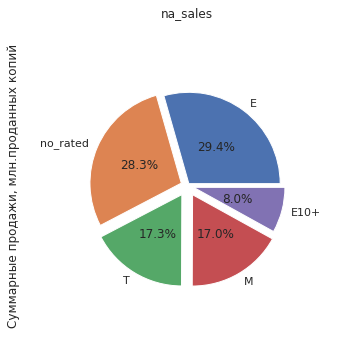

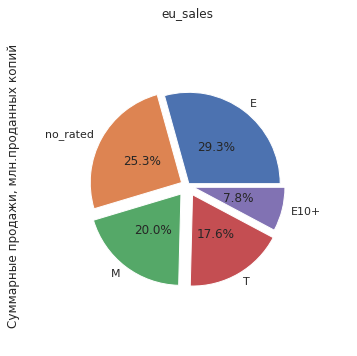

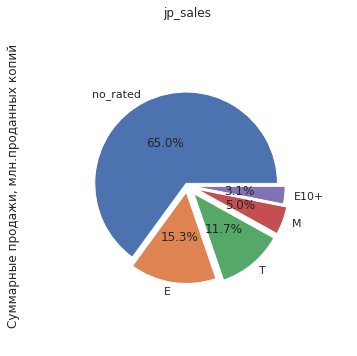

In [36]:
for reg in regions:
    (df.pivot_table(index='rating', values=reg, aggfunc='sum')
                .sort_values(reg, ascending=False).head(5)
                .plot(kind='pie', y=reg, figsize=(6, 6), legend=False, pctdistance=0.5, 
                      labeldistance=1.1, radius=0.7, title = reg, autopct='%1.1f%%', explode = [0.02, 0.05, 0.08, 0.08, 0.05])
                .set(ylabel='Суммарные продажи, млн.проданных копий')
    )
    plt.show()

Система ESRB

- E	Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. 
- E 10+	Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей.
- T	Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.
- M	Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков
- K-A для детей и взрослых (устарел и в настоящее время не используется) 

# Итоги
- В Северной Америке больше всего игр продается на xbox 360 и Ps2, немного отстаёт Wii,   и Ps3
- В Европейском регионе больше всего игр продается на Ps3, Ps2, xbox 360
- В Японском регионе  больше всего игр продается на DS, Ps, Ps2,
- Самые популярные жанры игр в Северной Америк Экшен и Спорт,  затем с небольшим отставанием идут шутеры, менее популярны музыкальные игры
- В европейском регионе результаты схожие с Северной Америкой
- Самые популярные жанры игр в Японском регионе  РПГ, затем Экшен и спорт, самые не популярные музыкальные игры
- Согласно исследования  больше всего спросом пользуются игры с рейтингом  Е (для всех возрастов)  по всем регионам, в Еропе и Северной Америке так же преобладает спрос на игры с рейтингом М (для лиц старше 17 лет.)
-Меньше всего спросом пользуются игры с рейтингом E10+ ( Подходит для лиц старше 10 лет) так же по всем регионам 


# Шаг 5. Проверьте гипотезы

# Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?

In [37]:
#выберем пользовательские рейтинги платформ Xbox One 
user_score_xone = df[df['platform']== "XOne"]
user_score_pc = df[df['platform']== "PC"]
#удалю значения NaN
user_score_xone = user_score_xone.dropna()
user_score_pc = user_score_pc.dropna()


In [38]:
var_xone = np.var(user_score_xone['user_score'])
var_pc= np.var(user_score_pc['user_score'])
print('{:} {: >5.2f} '.format('Дисперсия платформ Xbox One равна:', var_xone))
print('{:} {: >11.2f} '.format('Дисперсия платформ PC равна:', var_pc ))

Дисперсия платформ Xbox One равна:  1.79 
Дисперсия платформ PC равна:        2.32 


Формулировки гипотез:
H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Для проверки гипотезы возьмем стандартное значение alpha = 0.05

In [39]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    user_score_xone['user_score'],
    user_score_pc['user_score'],
    equal_var= False  # так как дисперсии генеральных совокупностей, из которых взяты выборки, не равны
    #equal_var= True # для сравнения результата (что будет когда  True)
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, т.е. средние пользовательские рейтинги платформ Xbox One и PC различаются!")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC одинаковы!")

p-значение: 3.237925656023916e-05
Отвергаем нулевую гипотезу, т.е. средние пользовательские рейтинги платформ Xbox One и PC различаются!


In [40]:
# сравним средние оценки
print('{:} {: >5.2f} '.format("Средний пользовательский рейтинг платформ Xbox One:", user_score_xone['user_score'].mean() ))
print('{:} {: >11.2f} '.format("Средний пользовательский рейтинг платформ PC:",user_score_pc['user_score'].mean() ))

Средний пользовательский рейтинг платформ Xbox One:  6.54 
Средний пользовательский рейтинг платформ PC:        7.04 


# Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [41]:
#выберем пользовательские рейтинги жанров Action и Sports
user_score_action = df[df['genre']== "Action"]
user_score_sports = df[df['genre']== "Sports"]
#удалю значения NaN
user_score_action = user_score_xone.dropna()
user_score_sports = user_score_pc.dropna()

In [45]:
var_action = np.var(user_score_action['user_score'])
var_sports= np.var(user_score_sports['user_score'])
print('{:} {: >5.2f} '.format('Дисперсия жанра Action равна:', var_action))
print('{:} {: >5.2f} '.format('Дисперсия жанра Sports равна:', var_sports))

Дисперсия жанра Action равна:  1.79 
Дисперсия жанра Sports равна:  2.32 


Формулировки гипотез:
H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
H1: Средние пользовательские рейтинги жанров Action и Sport разные.

Для проверки гипотезы возьмем стандартное значение alpha = 0.05

In [43]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    user_score_action['user_score'],
    user_score_sports['user_score'],
    equal_var= False  # так как дисперсии генеральных совокупностей, из которых взяты выборки, не равны
    #equal_var= True # для сравнения результата (что будет когда  True)
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, т.е. cредние пользовательские рейтинги жанров Action и Sport разные!")
else:
    print("Не получилось отвергнуть нулевую гипотезу, т.е cредние пользовательские рейтинги жанров Action и Sports одинаковые!")

p-значение: 3.237925656023916e-05
Отвергаем нулевую гипотезу, т.е. cредние пользовательские рейтинги жанров Action и Sport разные!


In [44]:
# сравним средние рейтинги
print('{:} {: >5.2f} '.format("Средний пользовательский рейтинг игр в жанре Экшен:", user_score_action['user_score'].mean() ))
print('{:} {: >11.2f} '.format("Средний пользовательский рейтинг игр в жанре Спорт:",user_score_sports['user_score'].mean() ))

Средний пользовательский рейтинг игр в жанре Экшен:  6.54 
Средний пользовательский рейтинг игр в жанре Спорт:        7.04 


# Шаг 6. Напишите общий вывод
# Итоги
- Согласно исследования мы можем увидеть, что с 1980 года по 1995 года игр продалась не много,  после 1995 года наблюдается постепенный рост продаж, с 2005 по 2010 года наблюдается резкий скачок продаж игр, с 2011 года начинается спад продаж игр.
- За весь период консольных приставок самые популярные оказались: PS2, X360, PS3, WII, DS, PS
-Также Согласно исследования, можно сделать вывод, что средняя продолжительность жизни игровой приставки составляет порядка 10 лет. Самый пик продаж наступает примерно через 5 лет после выпуска консоли
- Так же определили, что самый популярный жанр за все время это Шутеры Экшн в Северной Америке и Европе, в Японии самый популярный жанр РПГ. Самый не популярный это музыкальные игры стратегии
-Больше всего данных в исходном ДФ собранно из Северной Америки.
-Так же можно сделать вывод, что после 2016 года у пользователей будут пользоваться спросом игры на PS4, XOne
-Согласно исследования виден рост продаж игр на платформах Ps4,  XOne,  более перспективным направлением будет  выбрать основной регион для реализации игр это Северная Америка и Европа, там преобладает жанр игр Экшен и Шутеры,  соответственно я рекомендую выбрать регионы для реализации Европу и Северную Америку, игры выпускать в жанре Шутер и Экшен для приставок Ps4, Xone, а так же для Ps2 ввиду большого распространения данной платформы по 3 регионам.